**Part 1 - Data Source and Preparation**

In [2]:
import pandas as pd
import numpy as np

In [3]:
file_path = "analytic_data2025_v2.csv"
df = pd.read_csv(file_path, header=1)
df.head()

,statecode,countycode,fipscode,state,county,year,county_clustered,v001_rawvalue,v001_numerator,v001_denominator,...,v058_rawvalue,v058_numerator,v058_denominator,v058_cilow,v058_cihigh,v051_rawvalue,v051_numerator,v051_denominator,v051_cilow,v051_cihigh
0,0,0,0,US,United States,2025,NaN,8351.736549,4763989.0,925367214.0,...,0.200031,66300254.0,331449281.0,NaN,NaN,334914895.0,NaN,NaN,NaN,NaN
1,1,0,1000,AL,Alabama,2025,NaN,11853.247250,102760.0,13958454.0,...,0.422628,2123399.0,5024279.0,NaN,NaN,5108468.0,NaN,NaN,NaN,NaN
2,1,1,1001,AL,Autauga County,2025,1.0,9938.263382,1008.0,163064.0,...,0.406768,23920.0,58805.0,NaN,NaN,60342.0,NaN,NaN,NaN,NaN
3,1,3,1003,AL,Baldwin County,2025,1.0,8957.112686,3944.0,653515.0,...,0.375865,87113.0,231767.0,NaN,NaN,253507.0,NaN,NaN,NaN,NaN
4,1,5,1005,AL,Barbour County,2025,1.0,12738.656140,587.0,67912.0,...,0.659200,16627.0,25223.0,NaN,NaN,24585.0,NaN,NaN,NaN,NaN


In [4]:
print("Data shape:", df.shape)
df.describe()

Data shape: (3204, 796)


,statecode,countycode,fipscode,year,county_clustered,v001_rawvalue,v001_numerator,v001_denominator,v001_cilow,v001_cihigh,...,v058_rawvalue,v058_numerator,v058_denominator,v058_cilow,v058_cihigh,v051_rawvalue,v051_numerator,v051_denominator,v051_cilow,v051_cihigh
count,3204.000000,3204.000000,3204.000000,3204.0,3152.000000,3140.000000,3.140000e+03,3.140000e+03,3140.000000,3140.000000,...,3196.000000,3.196000e+03,3.196000e+03,0.0,0.0,3.196000e+03,0.0,0.0,0.0,0.0
mean,30.181024,101.948814,30282.972534,2025.0,0.980013,10367.292644,4.551340e+03,8.840548e+05,8708.793043,12189.264590,...,0.634513,6.223428e+04,3.111226e+05,NaN,NaN,3.143757e+05,NaN,NaN,NaN,NaN
std,15.187197,107.462954,15205.121194,0.0,0.139979,3813.656401,8.667880e+04,1.688701e+07,3402.728146,4657.580425,...,0.337312,1.189927e+06,5.995197e+06,NaN,NaN,6.057055e+06,NaN,NaN,NaN,NaN
min,0.000000,0.000000,0.000000,2025.0,0.000000,3315.252949,2.000000e+01,2.173000e+03,1422.102752,3554.778059,...,0.000000,0.000000e+00,6.400000e+01,NaN,NaN,4.300000e+01,NaN,NaN,NaN,NaN
25%,18.000000,33.000000,18156.500000,2025.0,1.000000,7719.617819,2.317500e+02,3.194450e+04,6348.101590,9038.871697,...,0.347400,7.967250e+03,1.097475e+04,NaN,NaN,1.092700e+04,NaN,NaN,NaN,NaN
50%,29.000000,77.000000,29164.000000,2025.0,1.000000,9798.223368,5.280000e+02,7.548650e+04,8318.519825,11498.885710,...,0.656656,1.574650e+04,2.659000e+04,NaN,NaN,2.671300e+04,NaN,NaN,NaN,NaN
75%,45.000000,133.000000,45069.500000,2025.0,1.000000,12344.826040,1.339750e+03,2.110610e+05,10652.386840,14543.343762,...,1.000000,2.850375e+04,7.414375e+04,NaN,NaN,7.564950e+04,NaN,NaN,NaN,NaN
max,56.000000,840.000000,56045.000000,2025.0,1.000000,46417.851930,4.763989e+06,9.253672e+08,36447.024050,59163.362700,...,1.000000,6.630025e+07,3.314493e+08,NaN,NaN,3.349149e+08,NaN,NaN,NaN,NaN


In [5]:
# All Select Measures
#Population Health & Well-Being
population_wellbeing_cols = ['v001_rawvalue', 'v036_rawvalue', 'v037_rawvalue','v042_rawvalue','v002_rawvalue']
# Community Conditions
community_cond_cols = ['v155_rawvalue','v132_rawvalue','v133_rawvalue','v004_rawvalue','v062_rawvalue','v088_rawvalue', 
    'v005_rawvalue', 'v050_rawvalue','v085_rawvalue','v136_rawvalue','v067_rawvalue','v137_rawvalue','v125_rawvalue','v124_rawvalue',  
    'v166_rawvalue','v181_rawvalue','v069_rawvalue','v168_rawvalue','v023_rawvalue','v044_rawvalue','v024_rawvalue','v135_rawvalue',
    'v140_rawvalue','v171_rawvalue']


In [6]:
id_cols = ['statecode', 'countycode', 'fipscode', 'state', 'county', 'year']
#df_select is temp dataframe which contains all ids, Population Health & Well-Being and Community Conditions
df_select = df[id_cols + population_wellbeing_cols + community_cond_cols]
print(df_select.shape)
df_select.head()

(3204, 35)


,statecode,countycode,fipscode,state,county,year,v001_rawvalue,v036_rawvalue,v037_rawvalue,v042_rawvalue,...,v166_rawvalue,v181_rawvalue,v069_rawvalue,v168_rawvalue,v023_rawvalue,v044_rawvalue,v024_rawvalue,v135_rawvalue,v140_rawvalue,v171_rawvalue
0,0,0,0,US,United States,2025,8351.736549,3.935528,0.084005,5.149831,...,0.897119,2.060697,0.678254,0.893929,0.036391,4.888713,0.160,83.562395,9.091519,0.278857
1,1,0,1000,AL,Alabama,2025,11853.247250,4.073055,0.104977,5.766892,...,0.856199,1.916186,0.617728,0.881280,0.024982,5.167305,0.213,93.387132,11.658760,0.255471
2,1,1,1001,AL,Autauga County,2025,9938.263382,4.300364,0.099958,5.832901,...,0.908804,1.124569,0.613787,0.902789,0.021889,4.273712,0.170,65.975725,11.211700,0.218351
3,1,3,1003,AL,Baldwin County,2025,8957.112686,3.876436,0.081333,6.020778,...,0.897509,3.862097,0.648479,0.917314,0.022795,4.359526,0.141,82.420053,9.698298,0.193541
4,1,5,1005,AL,Barbour County,2025,12738.656140,5.431030,0.124542,6.339986,...,0.723018,0.693579,0.440774,0.778137,0.044310,5.614339,0.348,85.603993,8.904720,0.285796


In [7]:
df_select.columns

Index(['statecode', 'countycode', 'fipscode', 'state', 'county', 'year',
       'v001_rawvalue', 'v036_rawvalue', 'v037_rawvalue', 'v042_rawvalue',
       'v002_rawvalue', 'v155_rawvalue', 'v132_rawvalue', 'v133_rawvalue',
       'v004_rawvalue', 'v062_rawvalue', 'v088_rawvalue', 'v005_rawvalue',
       'v050_rawvalue', 'v085_rawvalue', 'v136_rawvalue', 'v067_rawvalue',
       'v137_rawvalue', 'v125_rawvalue', 'v124_rawvalue', 'v166_rawvalue',
       'v181_rawvalue', 'v069_rawvalue', 'v168_rawvalue', 'v023_rawvalue',
       'v044_rawvalue', 'v024_rawvalue', 'v135_rawvalue', 'v140_rawvalue',
       'v171_rawvalue'],
      dtype='object')

**Part 1 + 2 - Feature Selection**

In [9]:
#Creating feature matrix after removing the Population Health & Well-Being measures + ids etc
df_predictors = df[community_cond_cols]
print(df_predictors.shape)
df_predictors

(3204, 24)


,v155_rawvalue,v132_rawvalue,v133_rawvalue,v004_rawvalue,v062_rawvalue,v088_rawvalue,v005_rawvalue,v050_rawvalue,v085_rawvalue,v136_rawvalue,...,v166_rawvalue,v181_rawvalue,v069_rawvalue,v168_rawvalue,v023_rawvalue,v044_rawvalue,v024_rawvalue,v135_rawvalue,v140_rawvalue,v171_rawvalue
0,0.48,0.844524,7.4,0.000749,0.003325,0.000735,2666.0,0.44,0.095484,0.168447,...,0.897119,2.060697,0.678254,0.893929,0.036391,4.888713,0.160,83.562395,9.091519,0.278857
1,0.41,0.614132,5.3,0.000637,0.001462,0.000496,3327.0,0.43,0.104887,0.130823,...,0.856199,1.916186,0.617728,0.881280,0.024982,5.167305,0.213,93.387132,11.658760,0.255471
2,0.36,0.544920,6.8,0.000440,0.000365,0.000301,4365.0,0.46,0.081904,0.135209,...,0.908804,1.124569,0.613787,0.902789,0.021889,4.273712,0.170,65.975725,11.211700,0.218351
3,0.44,0.616244,7.4,0.000627,0.001207,0.000471,2888.0,0.45,0.102123,0.119681,...,0.897509,3.862097,0.648479,0.917314,0.022795,4.359526,0.141,82.420053,9.698298,0.193541
4,0.39,0.548587,6.2,0.000401,0.000285,0.000324,3560.0,0.47,0.121170,0.138064,...,0.723018,0.693579,0.440774,0.778137,0.044310,5.614339,0.348,85.603993,8.904720,0.285796
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3199,0.39,0.926216,7.7,0.000433,0.002497,0.000605,1640.0,0.32,0.131791,0.107856,...,0.891004,5.276768,0.623602,0.925312,0.033381,4.525023,0.115,108.043559,7.981618,0.244695
3200,0.56,0.992285,8.7,0.000933,0.006457,0.001074,1522.0,0.47,0.152226,0.160021,...,0.916871,5.349852,0.771439,0.971596,0.021469,4.013741,0.057,54.745774,20.612359,0.193184
3201,0.35,0.636479,8.5,0.000582,0.003808,0.000869,2235.0,0.35,0.136523,0.090554,...,0.908009,3.476689,0.596771,0.946067,0.031772,3.672076,0.114,99.914779,2.896871,0.176352
3202,0.34,0.764476,8.3,0.001038,0.004540,0.000907,1917.0,0.30,0.149562,0.084570,...,0.840211,5.830504,0.701906,0.914197,0.033047,4.765282,0.173,100.324124,15.546055,0.269675


**Part 3 - Exploratory Data Analysis**

In [10]:
#Summary stats
df_predictors.describe()
#df_select.describe()

,v155_rawvalue,v132_rawvalue,v133_rawvalue,v004_rawvalue,v062_rawvalue,v088_rawvalue,v005_rawvalue,v050_rawvalue,v085_rawvalue,v136_rawvalue,...,v166_rawvalue,v181_rawvalue,v069_rawvalue,v168_rawvalue,v023_rawvalue,v044_rawvalue,v024_rawvalue,v135_rawvalue,v140_rawvalue,v171_rawvalue
count,3177.000000,3149.000000,3152.000000,3038.000000,3025.000000,3108.000000,3121.000000,3173.000000,3195.000000,3196.000000,...,3196.000000,3067.000000,3195.000000,3196.000000,3194.000000,3174.000000,3195.000000,3095.000000,3196.000000,3193.000000
mean,0.413097,0.623298,7.452824,0.000539,0.002119,0.000487,2822.978212,0.428623,0.104458,0.128588,...,0.844283,2.588900,0.593299,0.887942,0.035862,4.562475,0.189321,99.678759,11.315567,0.286167
std,0.103927,0.228622,1.202367,0.000367,0.002315,0.000347,1073.022103,0.082773,0.046349,0.044203,...,0.065573,2.839466,0.116891,0.054491,0.012150,0.808044,0.080200,29.877021,5.872681,0.070231
min,0.030000,0.000000,0.000000,0.000000,0.000000,0.000000,133.000000,0.040000,0.021493,0.000000,...,0.481383,0.001775,0.168058,0.468085,0.003123,2.271341,0.031000,27.747589,0.000000,0.122707
25%,0.350000,0.479005,6.800000,0.000297,0.000663,0.000276,2116.000000,0.380000,0.069111,0.101235,...,0.811206,1.244123,0.515953,0.857044,0.028021,4.028407,0.130000,79.298389,7.889231,0.234277
50%,0.420000,0.645772,7.600000,0.000474,0.001484,0.000439,2742.000000,0.430000,0.093822,0.122161,...,0.853598,2.028582,0.594130,0.899267,0.034037,4.424266,0.178000,96.745982,10.701409,0.279062
75%,0.490000,0.795820,8.300000,0.000718,0.002775,0.000649,3371.000000,0.490000,0.131362,0.148681,...,0.889566,3.137569,0.675659,0.927517,0.041477,4.956767,0.233000,114.976540,14.070822,0.329489
max,0.690000,1.000000,10.000000,0.005805,0.037126,0.008164,10322.000000,0.670000,0.376812,0.611570,...,1.000000,98.527132,0.932070,1.000000,0.172688,10.496679,0.632000,311.742293,59.612519,0.651725


In [11]:
#missing values for df_select only
missing_vals = df_select.isna().sum()
print('no of missing values in each col')
print(missing_vals.sort_values(ascending=False))
#missing_vals.sum() #1409 for df_select and 1212 for df_predictors

no of missing values in each col
v062_rawvalue    179
v004_rawvalue    166
v181_rawvalue    137
v135_rawvalue    109
v037_rawvalue    109
v088_rawvalue     96
v125_rawvalue     88
v005_rawvalue     83
v001_rawvalue     64
v124_rawvalue     63
v132_rawvalue     55
v133_rawvalue     52
v050_rawvalue     31
v044_rawvalue     30
v155_rawvalue     27
v171_rawvalue     11
v023_rawvalue     10
v069_rawvalue      9
v085_rawvalue      9
v024_rawvalue      9
v002_rawvalue      8
v140_rawvalue      8
v168_rawvalue      8
v166_rawvalue      8
v036_rawvalue      8
v137_rawvalue      8
v067_rawvalue      8
v136_rawvalue      8
v042_rawvalue      8
year               0
countycode         0
county             0
state              0
fipscode           0
statecode          0
dtype: int64


In [12]:
#identify outliers
# I am using Z score to identify outliers. Criteria Z>3 is an outlier
raw_cols = [col for col in df_select.columns if col.endswith('_rawvalue')]
z_scores = (df_select[raw_cols] - df_select[raw_cols].mean()) / df_select[raw_cols].std()
outlier_mask = np.abs(z_scores) > 3
outlier_counts = outlier_mask.sum().sort_values(ascending=False)
print("Number of outliers in each column:\n")
print(outlier_counts)

Number of outliers in each column:

v067_rawvalue    51
v125_rawvalue    50
v044_rawvalue    48
v023_rawvalue    47
v166_rawvalue    45
v062_rawvalue    44
v135_rawvalue    43
v140_rawvalue    42
v005_rawvalue    39
v037_rawvalue    37
v001_rawvalue    36
v168_rawvalue    36
v024_rawvalue    35
v133_rawvalue    35
v004_rawvalue    34
v181_rawvalue    33
v136_rawvalue    32
v085_rawvalue    31
v002_rawvalue    31
v088_rawvalue    30
v171_rawvalue    26
v050_rawvalue    20
v155_rawvalue    19
v036_rawvalue    13
v069_rawvalue     8
v042_rawvalue     5
v137_rawvalue     3
v124_rawvalue     0
v132_rawvalue     0
dtype: int64


**Part 3 - Plots**

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

In [14]:
all_cols = [col for col in df_select.columns if col.endswith('_rawvalue')] # for df_select i.e. all data

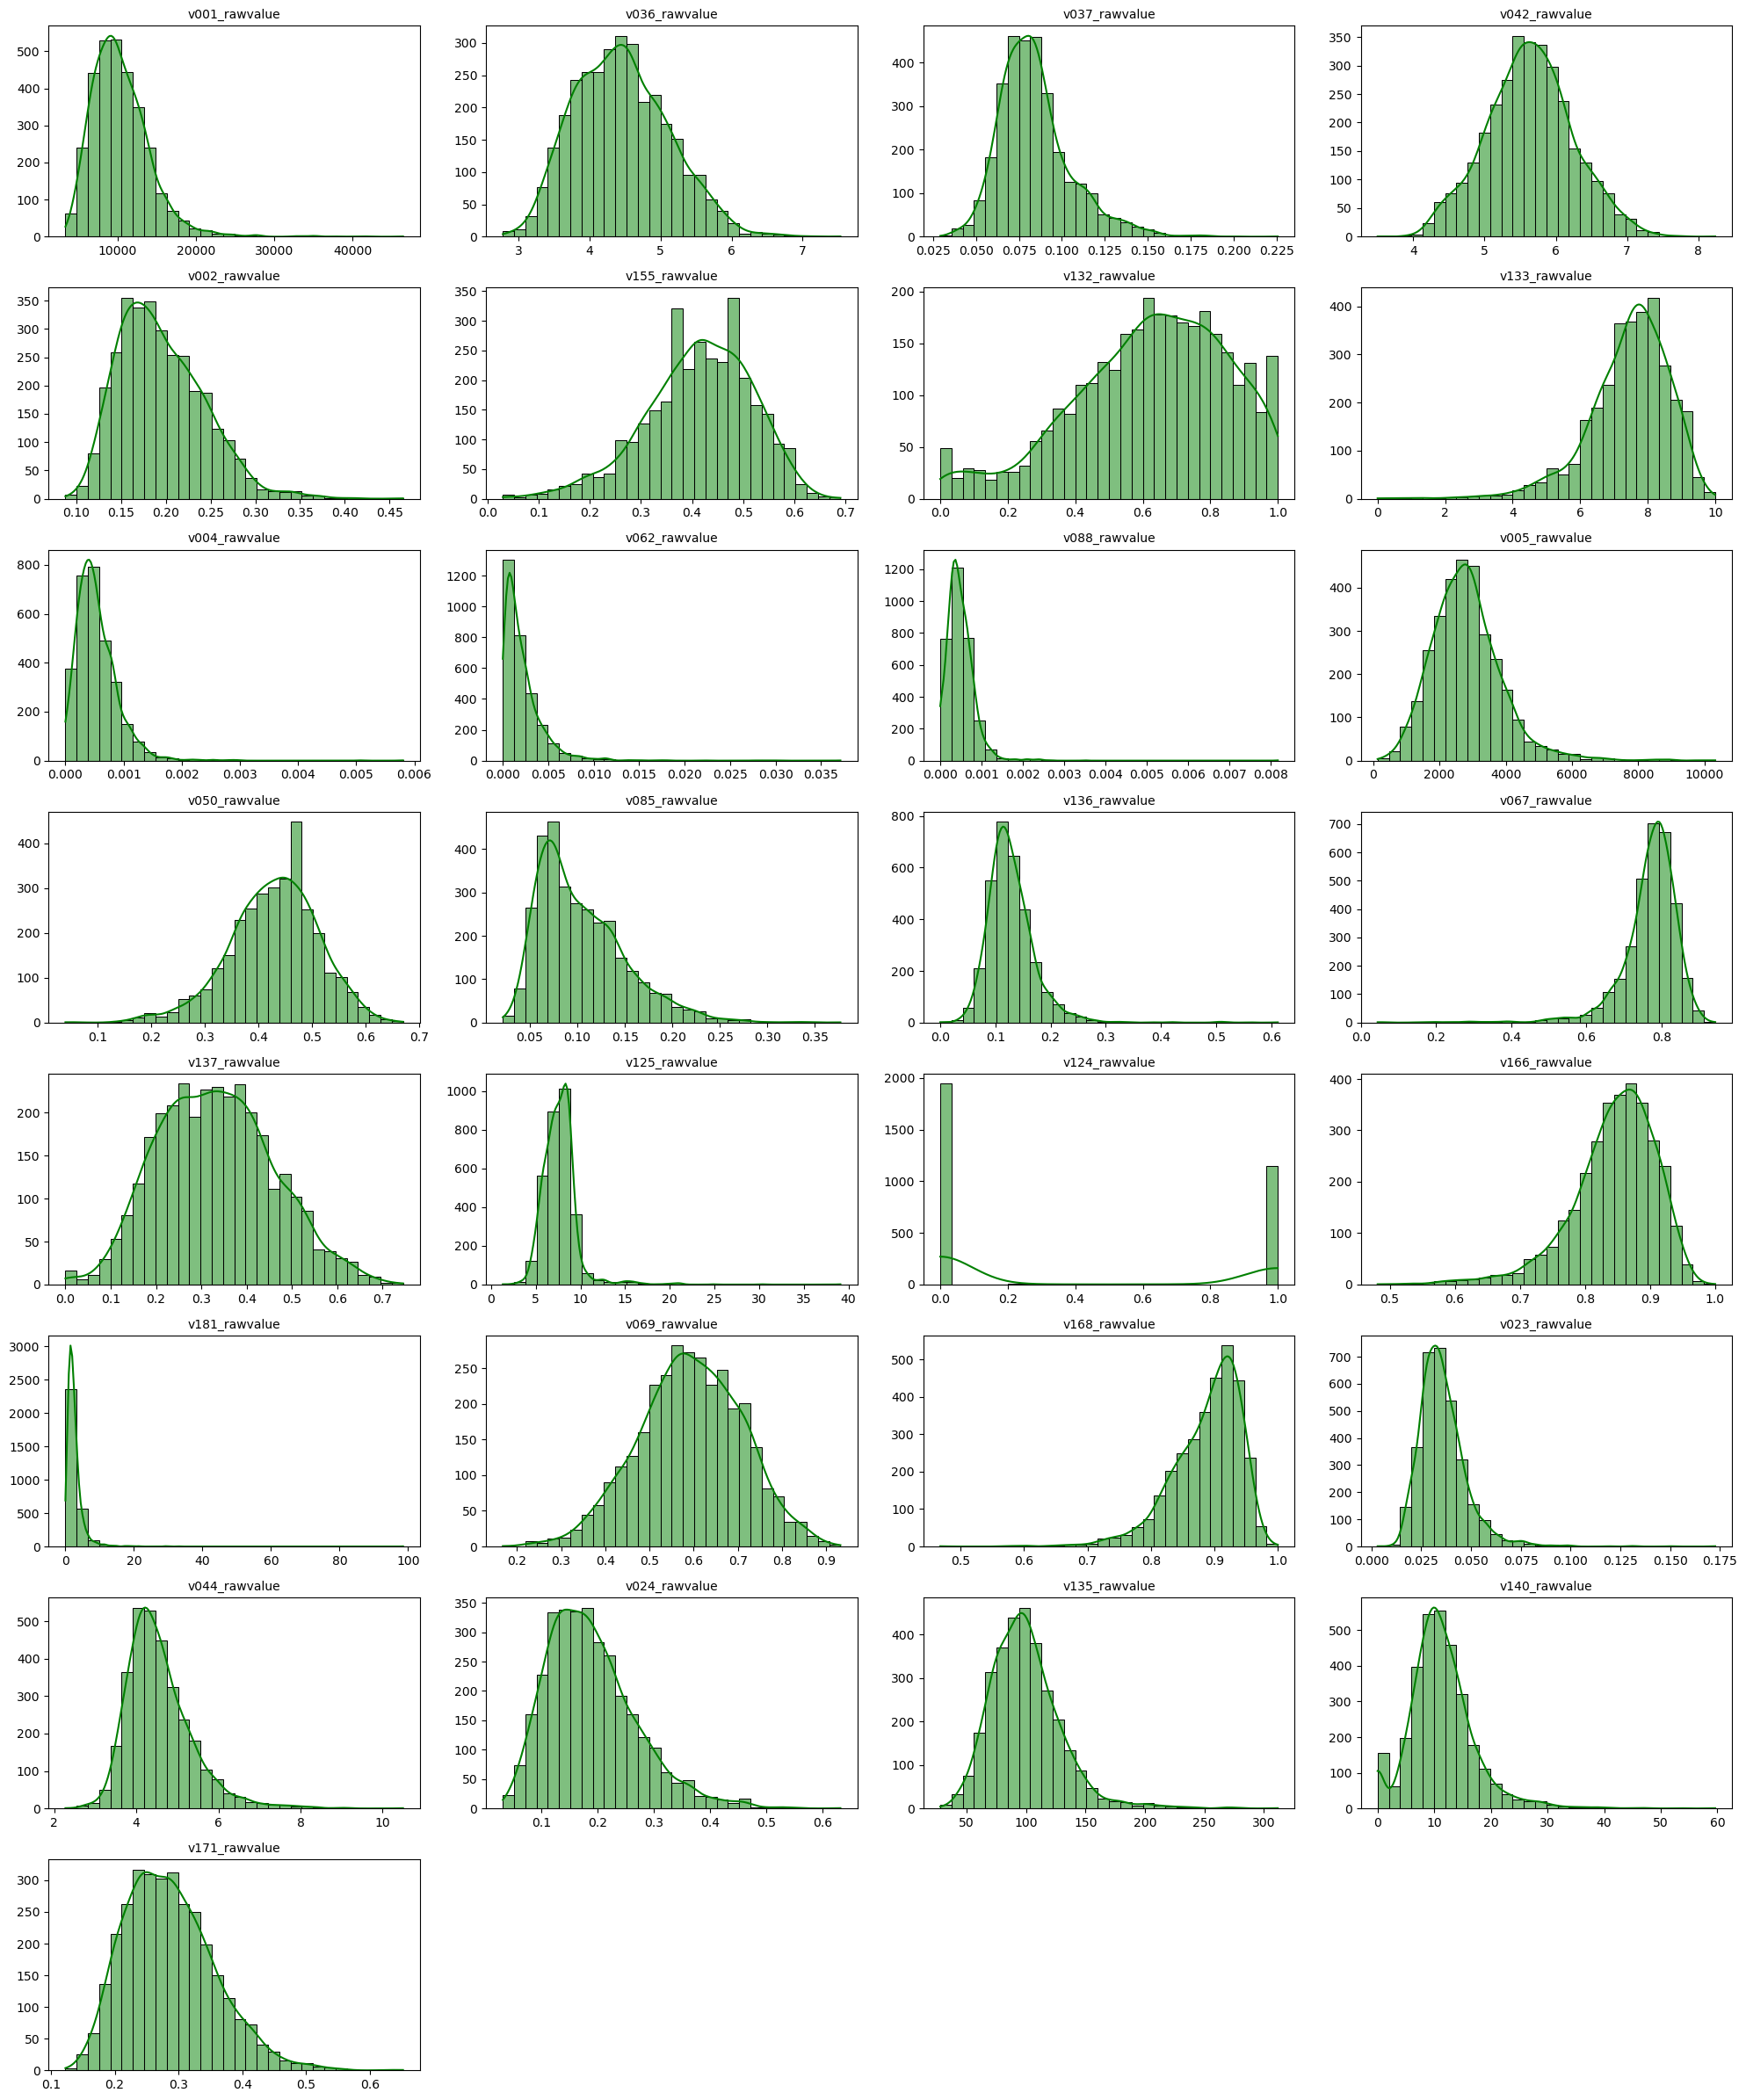

In [15]:
#Histograms - to check skewness etc
n_cols = 4
n_rows = (len(all_cols) + n_cols - 1) // n_cols

plt.figure(figsize=(20, n_rows*3))
for i, col in enumerate(all_cols, 1):
    plt.subplot(n_rows, n_cols, i)
    sns.histplot(df_select[col], bins=30, kde=True, color="green")
    plt.title(col, fontsize=10)
    plt.xlabel("")
    plt.ylabel("")
plt.tight_layout()
plt.show()

**Imp-> Observation after seeing Histogram: I learned that the distributions are mostly skewed for the columns so when imputing, I will have to use a combination of mean/median.**

In [16]:
#Box Plots division
#for rates
rate_cols = ['v004_rawvalue',  # Primary Care Physicians
    'v062_rawvalue',  # Mental Health Providers
    'v088_rawvalue',  # Dentists 
    'v005_rawvalue',  # Preventable Hospital Stay
    'v050_rawvalue',  # Mammography Screening
    'v135_rawvalue'   # Injury Deaths 
]

# for scores/indecxess
index_cols = [
    'v133_rawvalue',  # Food Environment Index
    'v125_rawvalue',  # Air Pollution (PM2.5
    'v181_rawvalue',  # Library Access
    'v171_rawvalue'   # Child Care Cost Burden
]

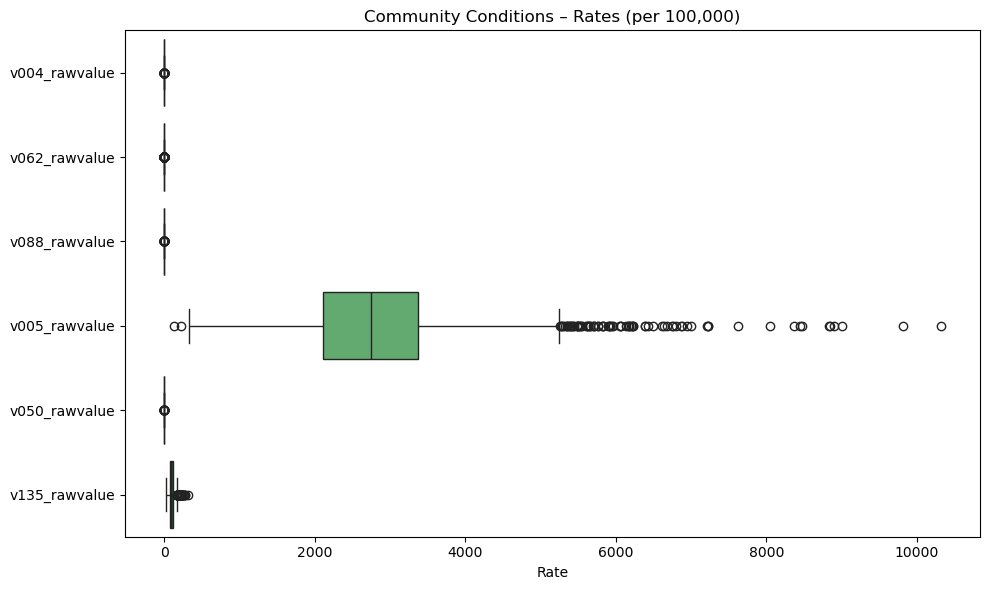

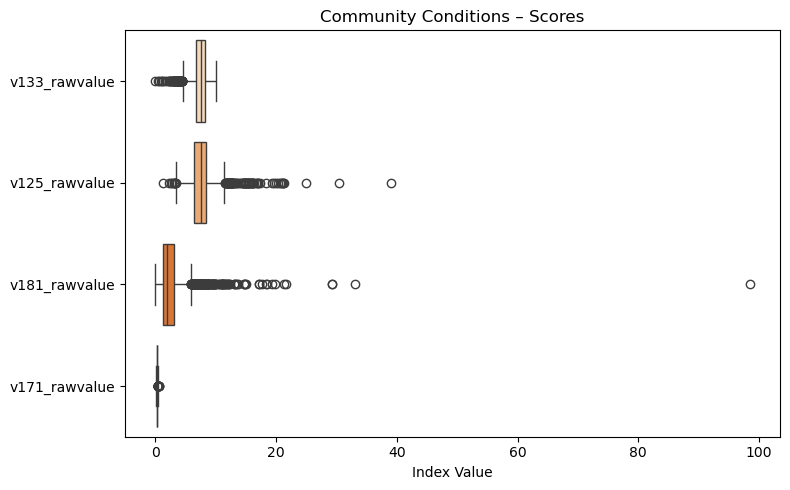

In [17]:
# Rates
plt.figure(figsize=(10,6))
sns.boxplot(data=df_select[rate_cols], orient="h", palette="Greens")
plt.title("Community Conditions – Rates (per 100,000)")
plt.xlabel("Rate")
plt.tight_layout()
plt.show()

# Indexes
plt.figure(figsize=(8,5))
sns.boxplot(data=df_select[index_cols], orient="h", palette="Oranges")
plt.title("Community Conditions – Scores")
plt.xlabel("Index Value")
plt.tight_layout()
plt.show()

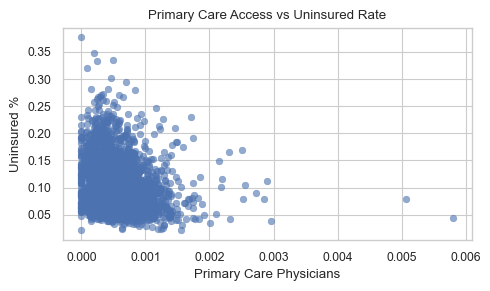

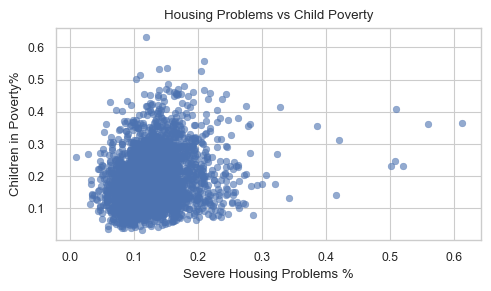

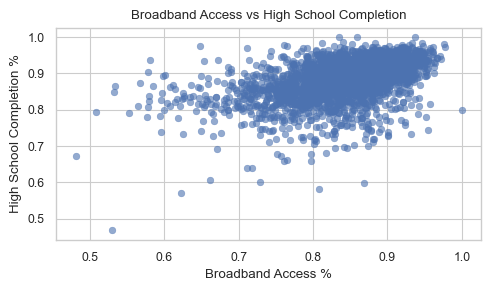

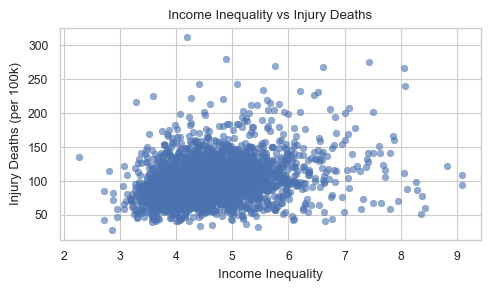

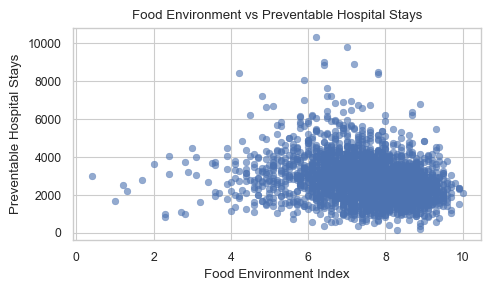

In [23]:
#Scatter Plots - check correlations
sns.set(style="whitegrid", context="paper") 

def scatter(x, y, xlabel, ylabel, title):
    plt.figure(figsize=(5,3))
    sns.scatterplot(
        x=df_select[x],
        y=df_select[y],
        alpha=0.6,
        edgecolor=None
    )
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(title)
    plt.tight_layout()
    plt.show()

# 1. Access to care vs uninsured
scatter('v004_rawvalue', 'v085_rawvalue',xlabel="Primary Care Physicians",ylabel="Uninsured %",title="Primary Care Access vs Uninsured Rate")

# 2. Housing vs child poverty
scatter('v136_rawvalue', 'v024_rawvalue',xlabel="Severe Housing Problems %",ylabel="Children in Poverty%",title="Housing Problems vs Child Poverty")

# 3. Broadband vs high school completion
scatter('v166_rawvalue', 'v168_rawvalue',xlabel="Broadband Access %",ylabel="High School Completion %",title="Broadband Access vs High School Completion")

# 4. Income inequality vs injury deaths
scatter('v044_rawvalue', 'v135_rawvalue',xlabel="Income Inequality",ylabel="Injury Deaths (per 100k)",title="Income Inequality vs Injury Deaths")

# 5. Food environment vs preventable hospital stays
scatter('v133_rawvalue', 'v005_rawvalue',xlabel="Food Environment Index",ylabel="Preventable Hospital Stays",title="Food Environment vs Preventable Hospital Stays")

In [24]:
#Correlation Matrix
df_predictors.corr()

,v155_rawvalue,v132_rawvalue,v133_rawvalue,v004_rawvalue,v062_rawvalue,v088_rawvalue,v005_rawvalue,v050_rawvalue,v085_rawvalue,v136_rawvalue,...,v166_rawvalue,v181_rawvalue,v069_rawvalue,v168_rawvalue,v023_rawvalue,v044_rawvalue,v024_rawvalue,v135_rawvalue,v140_rawvalue,v171_rawvalue
v155_rawvalue,1.000000,0.383390,0.425423,0.280928,0.161557,0.232096,-0.119052,0.524653,-0.346033,0.002483,...,0.388964,-0.059993,0.383971,0.327088,-0.209357,-0.156089,-0.412760,-0.370848,0.041033,-0.031248
v132_rawvalue,0.383390,1.000000,0.326019,0.407031,0.348366,0.414321,-0.176800,0.202383,-0.219251,0.207560,...,0.507000,0.058337,0.428101,0.278638,-0.062618,-0.113661,-0.337977,-0.297572,-0.008272,0.078064
v133_rawvalue,0.425423,0.326019,1.000000,0.227578,0.070111,0.181215,-0.232126,0.468553,-0.427234,-0.187823,...,0.517709,0.059318,0.447630,0.460660,-0.338728,-0.405006,-0.655678,-0.395738,0.146093,-0.131966
v004_rawvalue,0.280928,0.407031,0.227578,1.000000,0.432613,0.532410,-0.155678,0.228672,-0.189780,0.176507,...,0.294636,0.070630,0.407591,0.315866,-0.129535,0.027022,-0.251228,-0.126011,0.103270,0.122408
v062_rawvalue,0.161557,0.348366,0.070111,0.432613,1.000000,0.443996,-0.100791,0.008329,-0.193968,0.321817,...,0.232503,0.029413,0.258516,0.175928,0.080557,0.116447,-0.092203,0.030933,-0.041010,0.280898
v088_rawvalue,0.232096,0.414321,0.181215,0.532410,0.443996,1.000000,-0.163968,0.157239,-0.232339,0.260341,...,0.301522,0.018247,0.347553,0.274048,-0.044799,-0.009537,-0.220336,-0.127738,-0.015612,0.148831
v005_rawvalue,-0.119052,-0.176800,-0.232126,-0.155678,-0.100791,-0.163968,1.000000,-0.202990,0.119353,-0.010321,...,-0.244195,-0.205943,-0.296975,-0.328381,0.161865,0.260520,0.354113,0.177096,-0.037555,0.017023
v050_rawvalue,0.524653,0.202383,0.468553,0.228672,0.008329,0.157239,-0.202990,1.000000,-0.461520,-0.227755,...,0.261498,0.048590,0.415585,0.476688,-0.306932,-0.265513,-0.422809,-0.339117,0.260307,-0.090562
v085_rawvalue,-0.346033,-0.219251,-0.427234,-0.189780,-0.193968,-0.232339,0.119353,-0.461520,1.000000,0.156458,...,-0.308246,-0.017138,-0.435912,-0.571945,0.058104,0.155151,0.377371,0.119692,-0.058837,-0.168361
v136_rawvalue,0.002483,0.207560,-0.187823,0.176507,0.321817,0.260341,-0.010321,-0.227755,0.156458,1.000000,...,0.015077,-0.120053,-0.033390,-0.202757,0.348969,0.365148,0.223491,0.096235,-0.275492,0.232237


**Part 3 -Handling Missing Values/Outliers**

In [25]:
#used mean if the distribution of the measure (col) is not skewed and median if skewed. This is because median is less sensitive to skewness.

In [26]:
def impute_by_skew(df: pd.DataFrame, skew_thresh: float = 0.5):
    X = df.copy()
    for col in X.columns:
        if not np.issubdtype(X[col].dtype, np.number):
            continue
        s = X[col]
        skew = s.skew(skipna=True)
        fill_val = s.mean(skipna=True) if abs(skew) < skew_thresh else s.median(skipna=True)
        X[col] = s.fillna(fill_val)
    return X

X_imputed = impute_by_skew(df_predictors)

# checkk
print("NaNs before:", df_predictors.isna().sum().sum())
print("NaNs after :", X_imputed.isna().sum().sum())

NaNs before: 1212
NaNs after : 0


In [27]:
#used robust scaler instead of standard scaler as there are outliers present in most of the feature matrix.

In [28]:
from sklearn.preprocessing import RobustScaler

def robust_scale(df: pd.DataFrame) -> pd.DataFrame:
    scaler = RobustScaler()
    scaled = scaler.fit_transform(df.values)
    return pd.DataFrame(scaled, columns=df.columns, index=df.index)

X_scaled = robust_scale(X_imputed)

# peek
print(X_scaled.shape)
X_scaled.head()

(3204, 24)


,v155_rawvalue,v132_rawvalue,v133_rawvalue,v004_rawvalue,v062_rawvalue,v088_rawvalue,v005_rawvalue,v050_rawvalue,v085_rawvalue,v136_rawvalue,...,v166_rawvalue,v181_rawvalue,v069_rawvalue,v168_rawvalue,v023_rawvalue,v044_rawvalue,v024_rawvalue,v135_rawvalue,v140_rawvalue,v171_rawvalue
0,0.428571,0.639778,-0.133333,0.701029,0.940821,0.823708,-0.062784,0.1,0.026745,0.981008,...,0.557486,0.017936,0.534167,-0.075938,0.175812,0.506778,-0.176039,-0.386304,-0.260950,-0.002163
1,-0.071429,-0.101848,-1.533333,0.413639,-0.010947,0.158777,0.483271,0.0,0.178114,0.183596,...,0.033317,-0.062772,0.152556,-0.255893,-0.676241,0.810762,0.342298,-0.098421,0.155179,-0.248705
2,-0.428571,-0.324640,-0.533333,-0.086682,-0.571836,-0.384176,1.340768,0.3,-0.191855,0.276553,...,0.707175,-0.504885,0.127713,0.050109,-0.907285,-0.164276,-0.078240,-0.901627,0.082714,-0.640042
3,0.142857,-0.095049,-0.133333,0.388999,-0.141352,0.088220,0.120611,0.2,0.133624,-0.052557,...,0.562480,1.024005,0.346436,0.256754,-0.839614,-0.070641,-0.361858,-0.419777,-0.162596,-0.901607
4,-0.214286,-0.312836,-0.933333,-0.186955,-0.612643,-0.321196,0.675754,0.4,0.440224,0.337051,...,-1.672677,-0.745590,-0.963105,-1.723305,0.767272,1.298540,1.662592,-0.326482,-0.291229,0.070997


**Part 4 - Clustering**

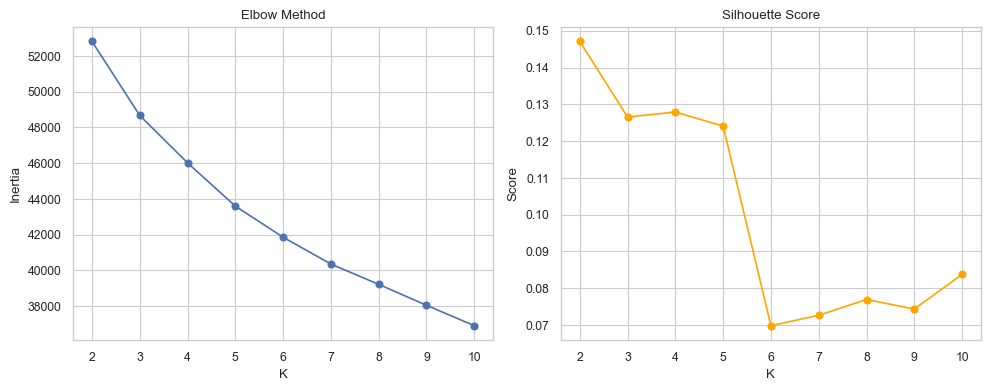

In [29]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

inertia = []
sil_scores = []
K_range = range(2, 11)

for k in K_range:
    km = KMeans(n_clusters=k, random_state=42, n_init=10)
    labels = km.fit_predict(X_scaled)
    inertia.append(km.inertia_)
    sil_scores.append(silhouette_score(X_scaled, labels))

plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
plt.plot(K_range, inertia, marker='o')
plt.title('Elbow Method')
plt.xlabel('K')
plt.ylabel('Inertia')

plt.subplot(1,2,2)
plt.plot(K_range, sil_scores, marker='o', color='orange')
plt.title('Silhouette Score')
plt.xlabel('K')
plt.ylabel('Score')
plt.tight_layout()
plt.show()


In [30]:
best_k = 3
kmeans = KMeans(n_clusters=best_k, random_state=42, n_init=10)
cluster_labels = kmeans.fit_predict(X_scaled.drop(columns='cluster', errors='ignore'))
X_scaled['cluster'] = cluster_labels
print("Cluster sizess:\n", X_scaled['cluster'].value_counts().sort_index())

Cluster sizess:
 cluster
0    1466
1    1129
2     609
Name: count, dtype: int64


**Justify the method used to determine the number of clusters (e.g., elbow method,
silhouette score).**

To decide on the number of clusters, I combined the elbow method and the silhouette score.
The elbow plot showed a sharp drop from K=2 to K≈3–4, after which the curve began to flatten.
This indicates that adding more clusters beyond three yields only small improvements in fit.
The silhouette analysis peaked at K=2 but remained relatively stable at K=3 before declining sharply for larger K.
Although K=2 gave the highest silhouette value, but it would create an overly coarse segmentation.
Balancing these two results, K=3 was chosen.
It captures additional meaningful variation suggested by the elbow method while maintaining acceptable cluster separation according to the silhouette score.

Observation: Good silhouette and before the elbow flattens it provides richer segmentation.

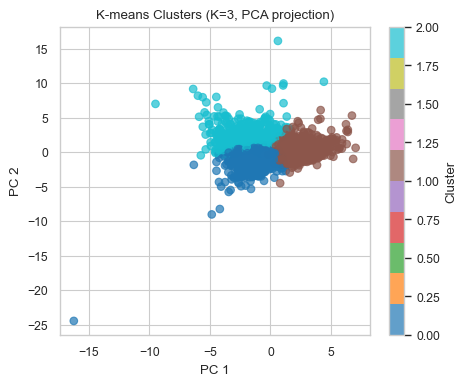

In [35]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2, random_state=42)
X_pca = pca.fit_transform(X_scaled.drop(columns='cluster'))
plt.figure(figsize=(5,4))
plt.scatter(X_pca[:,0], X_pca[:,1],c=X_scaled['cluster'], cmap='tab10', s=30, alpha=0.7)
plt.xlabel('PC 1')
plt.ylabel('PC 2')
plt.title('K-means Clusters (K=3, PCA projection)')
plt.colorbar(label='Cluster')
plt.show()

**Part 5 - Model 1: Linear Regression**

In [36]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
mask = df_select['v001_rawvalue'].notna()
X = X_scaled.loc[mask]          # predictors for rows with target present
y = df_select.loc[mask,'v001_rawvalue']

In [38]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

lr = LinearRegression()
lr.fit(X_train, y_train)

y_pred_train = lr.predict(X_train)
y_pred_test  = lr.predict(X_test)

# Evaluation
train_rmse = np.sqrt(mean_squared_error(y_train, y_pred_train))
test_rmse  = np.sqrt(mean_squared_error(y_test, y_pred_test))
train_r2   = r2_score(y_train, y_pred_train)
test_r2    = r2_score(y_test, y_pred_test)

print(f"Train RMSE: {train_rmse:.2f}")
print(f"Test RMSE : {test_rmse:.2f}")
print(f"Train R^2 : {train_r2:.3f}")
print(f"Test R^2  : {test_r2:.3f}")

Train RMSE: 1782.89
Test RMSE : 2250.54
Train R^2 : 0.772
Test R^2  : 0.702


In [39]:
from sklearn.model_selection import cross_val_score
cv_r2 = cross_val_score(lr, X, y, cv=5, scoring='r2')
cv_mse = cross_val_score(lr, X, y, cv=5, scoring='neg_mean_squared_error')
print("Cross-validatd Rsquare scores:", cv_r2)
print("Mean CV Rsquare:", cv_r2.mean())
print("Mean CV RMSE:", np.sqrt(-cv_mse.mean()))

Cross-validatd Rsquare scores: [0.77207712 0.69740721 0.76194999 0.69562657 0.73488386]
Mean CV Rsquare: 0.7323889488265325
Mean CV RMSE: 1964.9735415994537


In [40]:
#High R² with consistent folds means that the model generalizes well and is not overfitting.
#RMSE in context → If typical premature death values are in the range of, say, 6,000–8,000 years 
#lost per 100km an error of ~1,964 is reasonable.

In [41]:
coef_df = (pd.DataFrame({ 'feature': X.columns,'coefficient': lr.coef_}) .sort_values('coefficient', key=abs, ascending=False))
top5 = coef_df.head(5)
print(top5)

          feature  coefficient
21  v135_rawvalue  2164.035013
20  v024_rawvalue  1578.190300
10  v067_rawvalue   397.198939
23  v171_rawvalue  -367.418156
19  v044_rawvalue   360.330963


**Part 5 - Model 2: Decision Tree**

In [42]:
mask = df_select['v001_rawvalue'].notna()
X = X_scaled.loc[mask]                     # predictors 
y = df_select.loc[mask, 'v001_rawvalue']   # target

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [43]:
from sklearn.tree import DecisionTreeRegressor
tree = DecisionTreeRegressor(max_depth=6,min_samples_leaf=10,random_state=42)
tree.fit(X_train, y_train)

,criterion,'squared_error'
,splitter,'best'
,max_depth,6
,min_samples_split,2
,min_samples_leaf,10
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,42
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,ccp_alpha,0.0


In [44]:
y_pred_train = tree.predict(X_train)
y_pred_test  = tree.predict(X_test)

train_rmse = np.sqrt(mean_squared_error(y_train, y_pred_train))
test_rmse  = np.sqrt(mean_squared_error(y_test, y_pred_test))
train_r2   = r2_score(y_train, y_pred_train)
test_r2    = r2_score(y_test, y_pred_test)

print(f"Train RMSE: {train_rmse:.1f}")
print(f"Test RMSE : {test_rmse:.1f}")
print(f"Train Rsquared : {train_r2:.3f}")
print(f"Test Rsquared : {test_r2:.3f}")

Train RMSE: 1690.6
Test RMSE : 2557.5
Train Rsquared : 0.795
Test Rsquared : 0.615


In [46]:
#Preventing OVerfitting
from sklearn.model_selection import GridSearchCV
param_grid = {'max_depth': [3,5,7,9],'min_samples_leaf': [5,10,20]}
grid = GridSearchCV(DecisionTreeRegressor(random_state=42),param_grid,cv=5,scoring='r2',n_jobs=-1)
grid.fit(X, y)
print("Best parametrs:", grid.best_params_)
print("Mean CV R^2:", grid.best_score_)


Best parametrs: {'max_depth': 9, 'min_samples_leaf': 20}
Mean CV R^2: 0.6616012625505576


In [47]:
importance_df = pd.DataFrame({
    'feature': X.columns,
    'importance': grid.best_estimator_.feature_importances_
}).sort_values('importance', ascending=False)

print(importance_df.head(5))

          feature  importance
20  v024_rawvalue    0.615624
21  v135_rawvalue    0.279125
10  v067_rawvalue    0.023651
9   v136_rawvalue    0.021552
17  v168_rawvalue    0.009814


**List the five most important factors influencing premature death as shown by your models.**
See table below


In [48]:
#Consensus Top 5 (average rank across Linear Regression & Decision Tree):
#         feature  rank_LR rank_DR  avg_rank
#1  v024_rawvalue        2        1       1.5
#2  v135_rawvalue        1        2       1.5
#3  v067_rawvalue        3        3       3.0
#4  v136_rawvalue        4        4       4.0
#5  v005_rawvalue        6        7       6.5

**Evaluate the accuracy of both models and justify which one is more accurate.**

*The Linear Regression model is more accurate for this task.
It achieved higher R² and lower RMSE in both cross-validation and the test set.
The robust scaling and imputation handled outliers well, allowing the linear model to capture strong, nearly linear relationships between community conditions and premature death.
The Decision Tree, while more flexible, did not outperform the simpler linear model and carries a higher risk of overfitting.*

**Part 6 - Recommendations**

In [57]:
df_select[(df_select['state'] == 'PA') & (df_select['county'] == 'Allegheny County')]

,statecode,countycode,fipscode,state,county,year,v001_rawvalue,v036_rawvalue,v037_rawvalue,v042_rawvalue,...,v166_rawvalue,v181_rawvalue,v069_rawvalue,v168_rawvalue,v023_rawvalue,v044_rawvalue,v024_rawvalue,v135_rawvalue,v140_rawvalue,v171_rawvalue
2295,42,3,42003,PA,Allegheny County,2025,8412.24812,3.948716,0.089642,5.378282,...,0.898303,3.054122,0.805012,0.954698,0.033046,5.077306,0.152,108.382956,11.343982,0.364685


In [62]:
#comparison
mask = (df_select["state"] == "PA") & (df_select["county"] == "Allegheny County")
allegheny_X = X_scaled.loc[mask]             # scaled predictors for the model
allegheny_y_actual = df_select.loc[mask, "v001_rawvalue"]  # actual premature death value
# 2. Predict
allegheny_y_pred = lr.predict(allegheny_X)
# 3. Compare prediction to actual
print(f"Predicted premature death (per 100k): {allegheny_y_pred[0]:.1f}")
print(f"Actual premature death   (per 100k): {allegheny_y_actual.values[0]:.1f}")
print(f"Difference (Pred - Actual): {allegheny_y_pred[0] - allegheny_y_actual.values[0]:.1f}")


Predicted premature death (per 100k): 8890.6
Actual premature death   (per 100k): 8412.2
Difference (Pred - Actual): 478.3


In [60]:
#Allegheny is doing better than the ML model prediction.

**#Recommendations:**

Allegheny’s actual premature death rate (8,412) is ~1,386 lower than the U.S. median (9,798) and ~478 lower than the LR model prediction (8,891), showing the county is outperforming expectations overall. However, several community conditions remain worse than national medians and continue to elevate risk.

**Short-Term Priorities (0–12 months)**
1)Preventable Hospital Stays (+299) – Expand community health workers, transitional care programs, and telehealth to reduce avoidable admissions.

2)Injury Deaths (+11.6) – Scale harm-reduction programs (naloxone distribution, overdose hotlines) and enhance traffic safety to quickly cut injury fatalities.

3)Air Pollution PM2.5 (+3.7) – Tighten industrial emission controls, deploy air-quality alerts, and promote clean-diesel retrofits to reduce short-term exposure.

**Long-Term Investments (1–5 years)**

1)Severe Housing Problems (+0.004) – Increase affordable housing supply, strengthen code enforcement, and fund healthy-homes remediation to prevent housing-related health risks.

2)Food Environment Index (+0.8 above median but protective) – Continue supporting mobile markets and healthy corner stores to maintain access advantages.

3)Maintain Protective Factors – Preserve strengths such as low child poverty (–0.026), low uninsured rate (–0.047), and low solo commuting (–0.148) through sustained funding for tax-credit outreach, insurance enrollment, and public transit.


In [73]:
med = df_select[community_cond_cols].median()
gaps = {}
for feat in community_cond_cols:
    val = df_select.loc[mask, feat].values[0]
    gaps[feat] = val - med[feat]

gaps_df = pd.DataFrame.from_dict(gaps, orient='index', columns=['Allegheny_minus_median'])
print("\nAllegheny vs National Median on Features:")
print(gaps_df.loc[ ['v024_rawvalue','v135_rawvalue','v067_rawvalue','v136_rawvalue','v005_rawvalue'] ])



Allegheny vs National Median on Features:
               Allegheny_minus_median
v024_rawvalue               -0.026000
v135_rawvalue               11.636973
v067_rawvalue               -0.148466
v136_rawvalue                0.004423
v005_rawvalue              299.000000


In [74]:

raw_cols = [c for c in df_select.columns if c.endswith('_rawvalue')]

national_medians = df_select[raw_cols].median(numeric_only=True)

mask = (df_select["state"] == "PA") & (df_select["county"] == "Allegheny County")
allegheny_values = df_select.loc[mask, raw_cols].iloc[0]

comparison = pd.DataFrame({
    "National_Median": national_medians,
    "Allegheny_Value": allegheny_values
})
comparison["Allegheny_minus_Median"] = (
    comparison["Allegheny_Value"] - comparison["National_Median"]
)
comparison["Abs_Gap"] = comparison["Allegheny_minus_Median"].abs()
comparison_sorted = comparison.sort_values("Abs_Gap", ascending=False)

# Display top 20 features where Allegheny differs most from national median
print(comparison_sorted.head(20))


               National_Median  Allegheny_Value  Allegheny_minus_Median  \
v001_rawvalue      9798.223368      8412.248120            -1385.975248   
v005_rawvalue      2742.000000      3041.000000              299.000000   
v135_rawvalue        96.745982       108.382956               11.636973   
v125_rawvalue         7.600000        11.300000                3.700000   
v181_rawvalue         2.028582         3.054122                1.025540   
v124_rawvalue         0.000000         1.000000                1.000000   
v133_rawvalue         7.600000         8.400000                0.800000   
v044_rawvalue         4.424266         5.077306                0.653041   
v140_rawvalue        10.701409        11.343982                0.642574   
v036_rawvalue         4.413319         3.948716               -0.464603   
v132_rawvalue         0.645772         0.933263                0.287491   
v042_rawvalue         5.635066         5.378282               -0.256784   
v069_rawvalue         0.5